In [ ]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

linux_mem1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_memory1.csv')
linux_mem2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_memory2.csv')
linux_mem = pd.concat([linux_mem1, linux_mem2])

print(linux_mem.shape)
linux_mem.head()

(2000000, 13)


,ts,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label,type
0,1554218915,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0,normal
1,1554218920,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0,normal
2,1554218925,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0,normal
3,1554218930,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0,normal
4,1554218935,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0,normal


In [ ]:
linux_mem.drop('ts', axis = 1, inplace=True)
linux_mem.drop('type', axis = 1, inplace= True)

linux_mem.head()

,PID,MINFLT,MAJFLT,VSTEXT,VSIZE,RSIZE,VGROW,RGROW,MEM,CMD,label
0,3257,859502,54,193,2.0,519.1,2.0,519.1,0.14,Web-Content,0
1,3197,247354,95,193,2.6,402.0,2.6,402.0,0.11,firefox,0
2,1442,57311,33,2219,764.2,290.7,764.2,290.7,0.08,Xorg,0
3,3119,68006,17,3063,725.9,116.8,725.9,116.8,0.03,update-manager,0
4,2797,72300,69,1350,1.4,109.6,1.4,109.6,0.03,nautilus,0


In [ ]:
linux_mem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   PID     int64  
 1   MINFLT  object 
 2   MAJFLT  object 
 3   VSTEXT  object 
 4   VSIZE   float64
 5   RSIZE   object 
 6   VGROW   object 
 7   RGROW   object 
 8   MEM     float64
 9   CMD     object 
 10  label   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 183.1+ MB


In [ ]:
linux_mem.isnull().sum().sum()

0

In [ ]:
linux_mem['VGROW'] = (linux_mem['VGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['VGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B', ' '], [10**3, 10**6, 10**9, '']).astype(int))

linux_mem['MINFLT'] = (linux_mem['MINFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MINFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['MAJFLT'] = (linux_mem['MAJFLT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['MAJFLT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['VSTEXT'] = (linux_mem['VSTEXT'].replace(r'[KMB]+$', '', regex=True).astype(float) * linux_mem['VSTEXT'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RGROW'] = (linux_mem['RGROW'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RGROW'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

linux_mem['RSIZE'] = (linux_mem['RSIZE'].replace([r'[KMB]+$', ' '], ['', '' ], regex=True).astype(float) * linux_mem['RSIZE'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
linux_mem['CMD'] = le.fit_transform(linux_mem['CMD'])

col:  PID


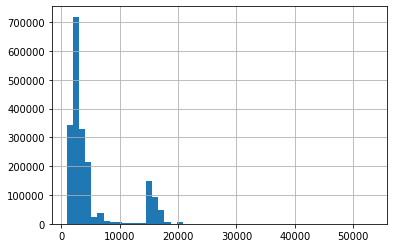

col:  MINFLT


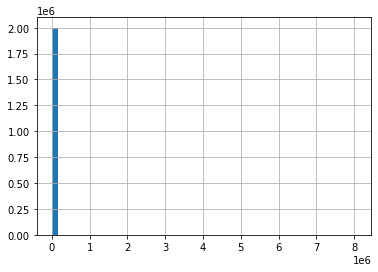

col:  MAJFLT


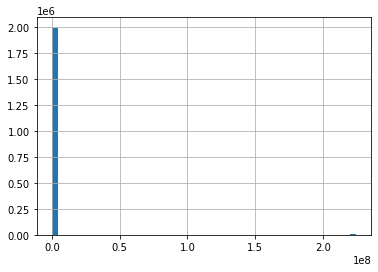

col:  VSTEXT


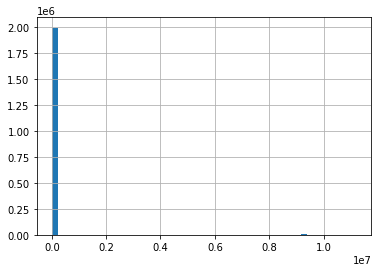

col:  VSIZE


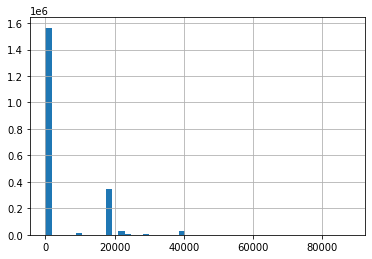

col:  RSIZE


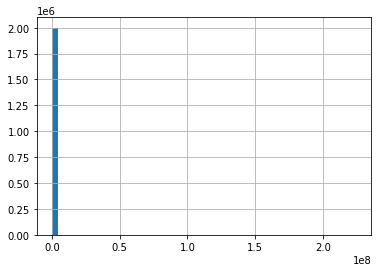

col:  VGROW


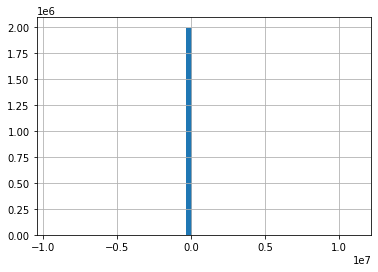

col:  RGROW


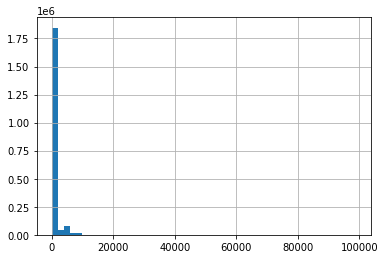

col:  MEM


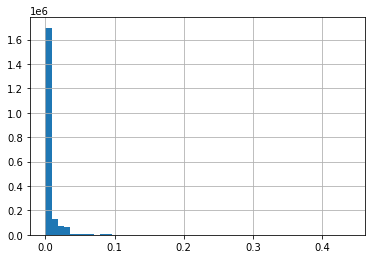

col:  CMD


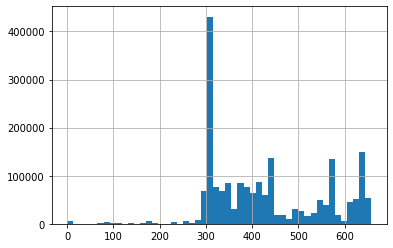

col:  label


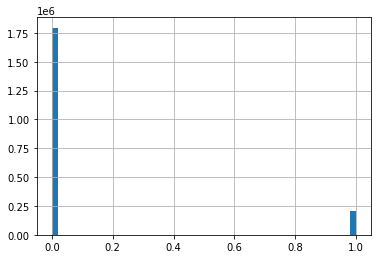

In [ ]:
import matplotlib.pyplot as plt
columns = linux_mem.columns
for col in columns:
    print("col: ", col)
    linux_mem[col].hist(bins = 50)
    plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

def get_accuracy_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelAccuracyTest = accuracy_score(y_pred,y_test)
    return modelAccuracyTest

def get_f1_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    modelF1Test = f1_score(y_pred,y_test)
    return modelF1Test

In [ ]:
x = linux_mem.drop('label', axis = 1)
y = linux_mem['label']

# Without Oversampling

In [ ]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RandomForest : ",rfcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
rfcf1_scr = f1_score(y_test, y_pred_rfc)
print("f1_score of RandomForest : ",rfcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_rfc)
print('AUC: %.2f' % auc)

[0 0 0 ... 0 0 0]
Accuracy of RandomForest :  92.8532 %
f1_score of RandomForest :  59.9941783659121 %
AUC: 0.75


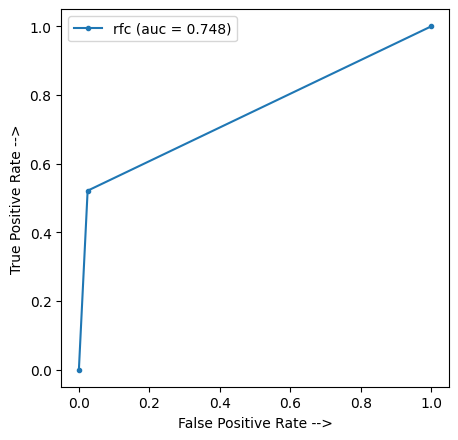

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 1570080, 1: 179920}
After oversampling {0: 1570080, 1: 1570080}


In [ ]:
# --------------------------Random Forest -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]
    
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, random_state=1)
rfc.fit(x_train, y_train) #Training the model
y_pred_rfc = rfc.predict(x_test)
print(y_pred_rfc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
rfcAccuracy = accuracy_score(y_test, y_pred_rfc)
print("Accuracy of RandomForest : ",rfcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
rfcf1_scr = f1_score(y_test, y_pred_rfc)
print("f1_score of RandomForest : ",rfcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_rfc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 1 1]
Accuracy of RandomForest :  87.73209008458169 %
f1_score of RandomForest :  87.82612652698 %
AUC: 0.88


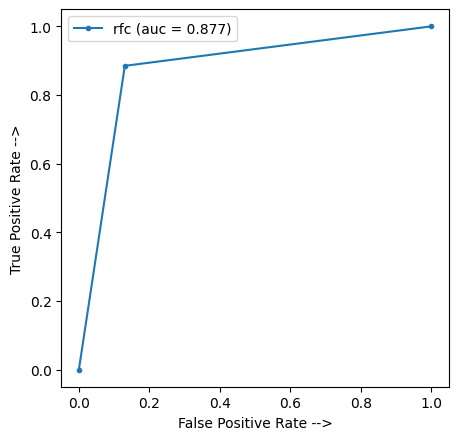

In [ ]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='rfc (auc = %0.3f)' % auc_rfc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()